In [2]:
import csv 
import json 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("hr_clean_data_2023.csv")
df.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,datebirth,remotework
0,51,No,NaN,2015.72,NaN,6,3,NaN,1,1,M,3,5,research director,3,NaN,16280.830000,42330.17,7,No,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,NaN,15,15,1972,Yes
1,52,No,NaN,2063.39,NaN,1,4,Life Sciences,2,3,M,2,5,manager,3,NaN,16665.833333,43331.17,0,NaN,14,"3,0",1,Full Time,1,"34,0",5,"3,0",33,NaN,11,9,1971,Yes
2,42,No,travel_rarely,1984.25,Research & Development,4,2,Technical Degree,3,3,M,3,5,manager,4,married,16026.666667,41669.33,1,No,11,"3,0",4,Full Time,0,"22,0",3,NaN,22,NaN,11,15,1981,Yes
3,47,No,travel_rarely,1771.40,NaN,2,4,Medical,4,1,F,3,4,research director,3,married,14307.500000,37199.50,3,NaN,19,"3,0",2,Full Time,2,NaN,2,NaN,20,NaN,5,6,1976,No
4,46,No,NaN,1582.77,NaN,3,3,Technical Degree,5,1,F,4,4,sales executive,1,divorced,12783.920000,33238.20,2,No,12,"3,0",4,Full Time,1,NaN,5,"3,0",19,NaN,2,8,1977,No


In [3]:
def contar_nulos_por_columna(df):
    nulos = df.isnull().sum()
    print("Cantidad de valores nulos por columna:")
    print(nulos[nulos > 0])

In [4]:
contar_nulos_por_columna(df)

Cantidad de valores nulos por columna:
businesstravel         772
department            1312
educationfield         745
maritalstatus          651
overtime               676
performancerating      195
totalworkingyears      526
worklifebalance        108
yearsincurrentrole    1580
dtype: int64


In [5]:
def mostrar_dtypes(df):
   
    print("Tipos de datos por columna:\n")
    print(df.dtypes)

In [6]:
mostrar_dtypes(df)

Tipos de datos por columna:

age                           int64
attrition                    object
businesstravel               object
dailyrate                   float64
department                   object
distancefromhome              int64
education                     int64
educationfield               object
employeenumber                int64
environmentsatisfaction       int64
gender                       object
jobinvolvement                int64
joblevel                      int64
jobrole                      object
jobsatisfaction               int64
maritalstatus                object
monthlyincome               float64
monthlyrate                 float64
numcompaniesworked            int64
overtime                     object
percentsalaryhike             int64
performancerating            object
relationshipsatisfaction      int64
standardhours                object
stockoptionlevel              int64
totalworkingyears            object
trainingtimeslastyear         int64

TABLAS GENERALES EMPRESA:
EDAD
GÉNERO
AÑOS EN LA EMPRESA

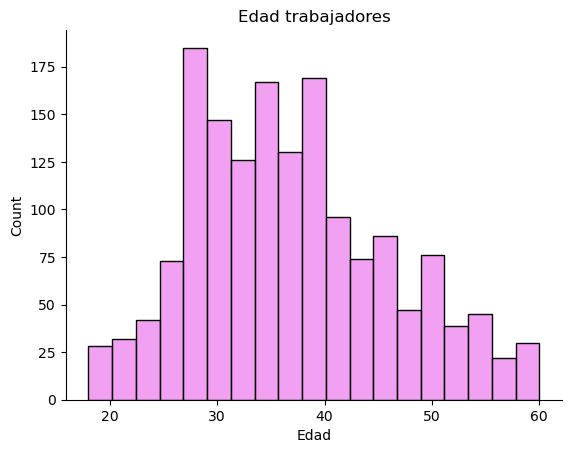

In [68]:
sns.histplot(data=df, x='age', color= 'violet')
plt.title('Edad trabajadores')
plt.xlabel('Edad')
sns.despine(top=True, right=True)
#las edades se encuentran entre casi 30 y 40, la media de edad es de 36 años, con más cantidad de gente por encima de 40 que por debajo de 28.

Text(0.5, 1.0, 'Distribución por género')

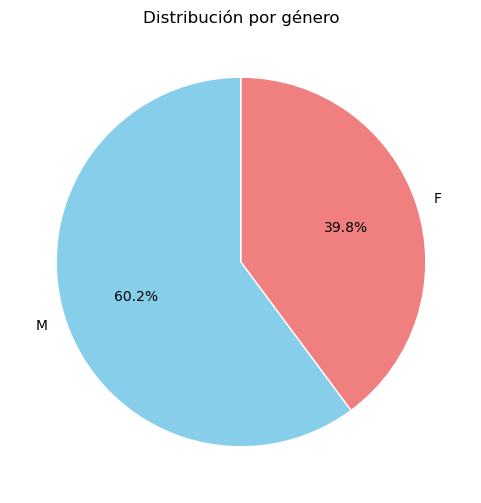

In [67]:
contar_genero = df['gender'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(contar_genero, 
        labels=contar_genero.index, 
        autopct='%1.1f%%', 
        colors=['skyblue', 'lightcoral'], 
        startangle=90,
        wedgeprops={'edgecolor': 'white'})
plt.title('Distribución por género')

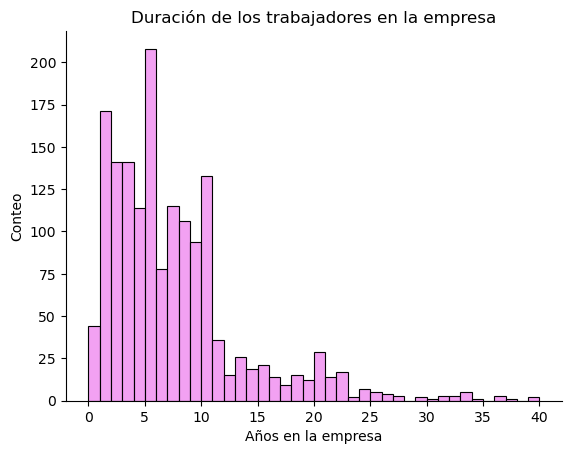

In [69]:
sns.histplot(data=df, x='yearsatcompany', color='violet')
plt.title('Duración de los trabajadores en la empresa')
plt.xlabel('Años en la empresa')
plt.ylabel('Conteo')
sns.despine(top=True, right=True)


GENDER JOBROLE
GENDER ATTRITION
GENDER WORKLIFEBALANCE
GENDER MONTHLYINCOME

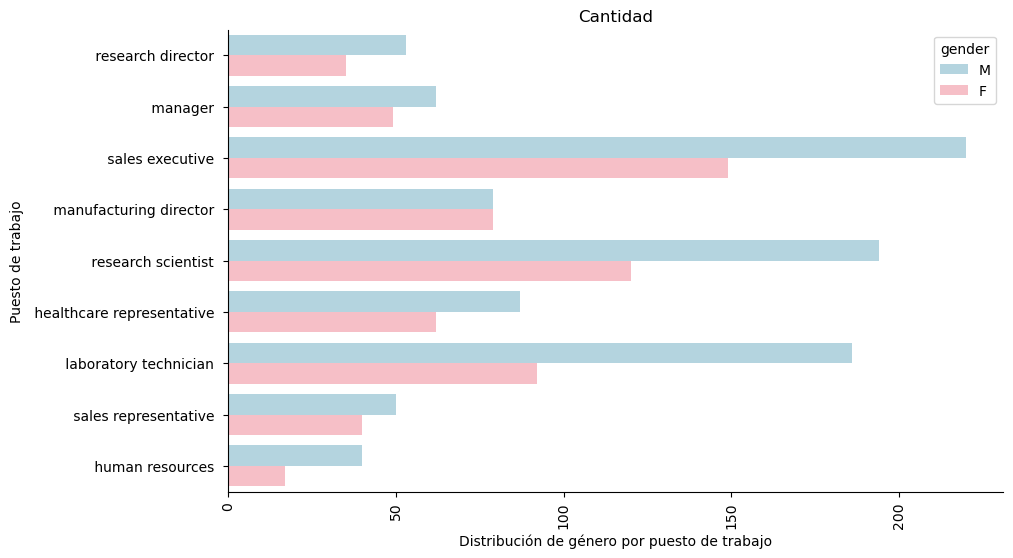

In [75]:
#GENDER Y JOB ROLE
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='jobrole', hue='gender', palette=['lightblue', 'lightpink'])
plt.xticks(rotation=90)
plt.title('Cantidad')
plt.ylabel('Puesto de trabajo')
plt.xlabel('Distribución de género por puesto de trabajo')
sns.despine(top=True, right=True)
#Podemos ver que todos los campos tienen un número más elevado de hombres que de mujeres, excepto en el puesto de dirección de producción, puesto tradicionalmente masculino, lo que puede insinuar que están aplicando medidas de equidad de género, aunque aún contrasta con que en el resto de puestos de alta dirección haya más hombres que mujeres.

In [16]:
sns.palettes.SEABORN_PALETTES.keys()

dict_keys(['deep', 'deep6', 'muted', 'muted6', 'pastel', 'pastel6', 'bright', 'bright6', 'dark', 'dark6', 'colorblind', 'colorblind6'])

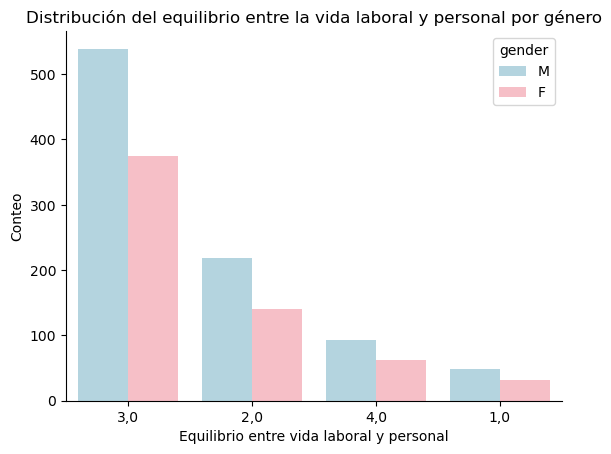

In [4]:
#GENDER Y LIFEBALANCE
sns.countplot(data=df, x='worklifebalance', hue='gender', palette= ['lightblue', 'lightpink'])
plt.title('Distribución del equilibrio entre la vida laboral y personal por género')
plt.xlabel('Equilibrio entre vida laboral y personal')
plt.ylabel('Conteo')
sns.despine(top=True, right=True)

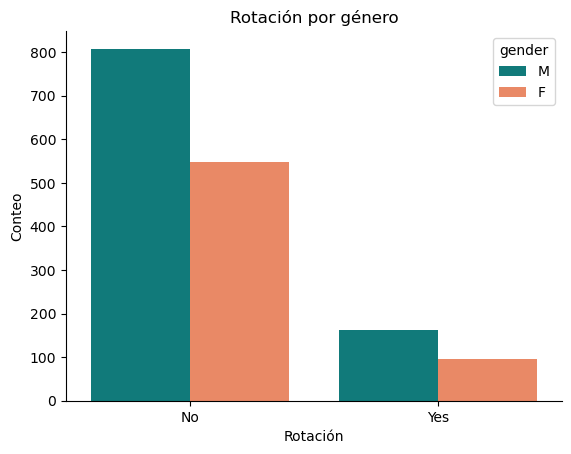

In [77]:
#ATTRITION Y GENDER

sns.countplot(data=df, x='attrition', hue='gender', palette=['darkcyan', 'coral'])
plt.title('Rotación por género')
plt.xlabel('Rotación')
plt.ylabel('Conteo') 
sns.despine(top=True, right=True)
#pocos empleados dejaron la empresa, pero de los que se fueron los valores entre géneros están más igualados que los que no se fueron de la empresa
#ambos géneros tienen motivos similares para abandonar a la empresa, proponer encuestas para ver las razones de salida de la empresa, fortalecer medidas de desarrollo profesional

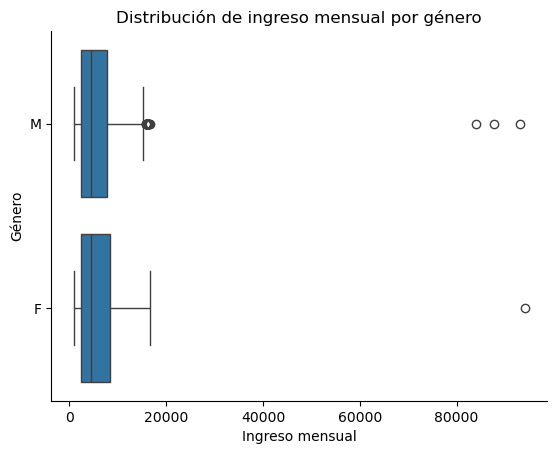

In [78]:
sns.boxplot(data=df, y='gender', x='monthlyincome')
plt.title('Distribución de ingreso mensual por género')
plt.xlabel('Ingreso mensual')
plt.ylabel('Género')
sns.despine(top=True, right=True)
#parece que a primera vista no hay brecha salarial por género, por lo que tendrán aplicadas buenas medidas de equidad salarial en general,
#por otro lado, podemos observar que hay un número mayor de ingresos más elevados en el género masculina, por lo que suponemos que la igualdad de oportunidades para llegar a tener sueldos más elevados no está del todo equilibrada entre géneros aún.
#sugerencias: auditoría interna para promociones, medir mensualmente el desempeño de los trabajadores evitando sesgos y confiando en las habilidades de los trabajadores

ATTRITION - JOBSATISFACTION
ATTITION - YEARSATCOMPANY

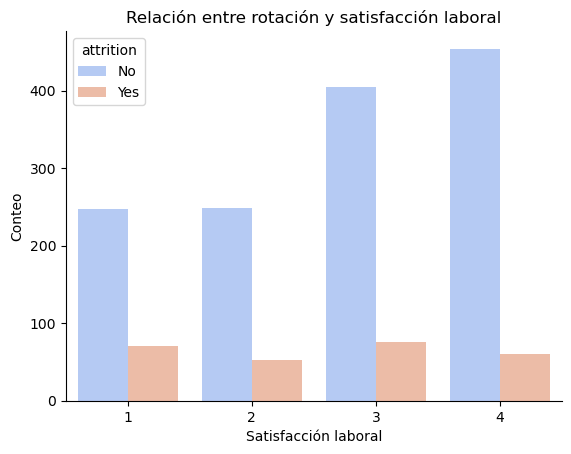

In [63]:
#ATTRITIONS VS JOBSATISFACTION
sns.countplot(data=df, hue='attrition', x='jobsatisfaction', palette='coolwarm')
plt.title('Relación entre rotación y satisfacción laboral')
plt.xlabel('Satisfacción laboral')
plt.ylabel('Conteo')
sns.despine(top=True, right=True)
#los que se quedan están bastante satisfechos, aunque con posibles mejoras laborales ya que hay suficientes puntuaciones bajas para tener en consideración.
# mientras que los que se van han votado que su satisfacion laboral de manera bastante equitativa, por lo que nos lleva a pensar que su salida de la empresa no ha sido debido
#a su insatisfacción laboral, por lo que la satisfacción laboral no es lo único a tener en cuenta para retener talento.

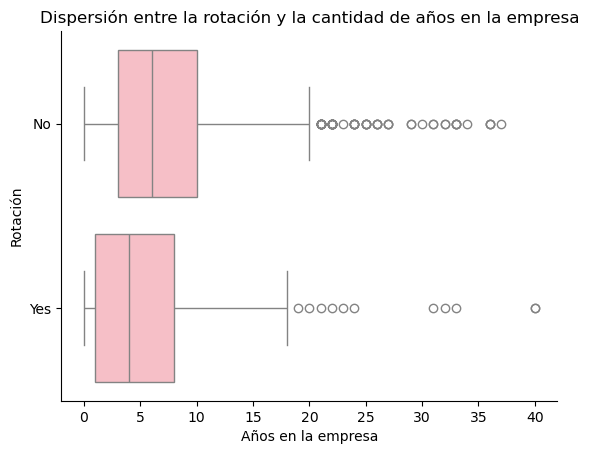

In [80]:
sns.boxplot(data=df, y='attrition', x='yearsatcompany', color='lightpink') 
plt.title('Dispersión entre la rotación y la cantidad de años en la empresa')
plt.xlabel('Años en la empresa')
plt.ylabel('Rotación')
sns.despine(top=True, right=True)
#la media de años en la empresa es de 7 años

WORKLIFE BALANCE- JOBSATISFACTION
WORKLIFEBALANCE - MARITALSTATUS

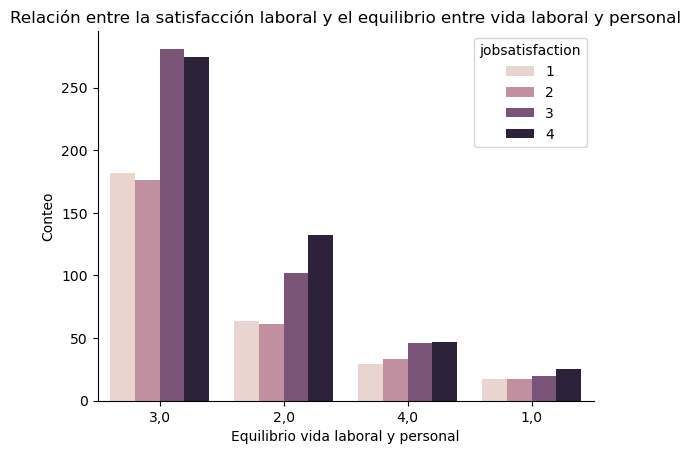

In [7]:
#worklifebalance y jobsatisfaction

sns.countplot(data=df, x='worklifebalance', hue='jobsatisfaction')
plt.title('Relación entre la satisfacción laboral y el equilibrio entre vida laboral y personal')
plt.xlabel('Equilibrio vida laboral y personal')
plt.ylabel('Conteo')
sns.despine(top=True, right=True)
#Las personas que están satisfechas con su trabajo, consideran que tienen un buen equilibrio entre su vida laboral y personal, por otro lado,
# parece que no se llegan a cubrir todas las necesidades del personal, ya que pese a estar medianamente contentos con su trabajo,
#aún faltan medidas para mejorar la conciliación

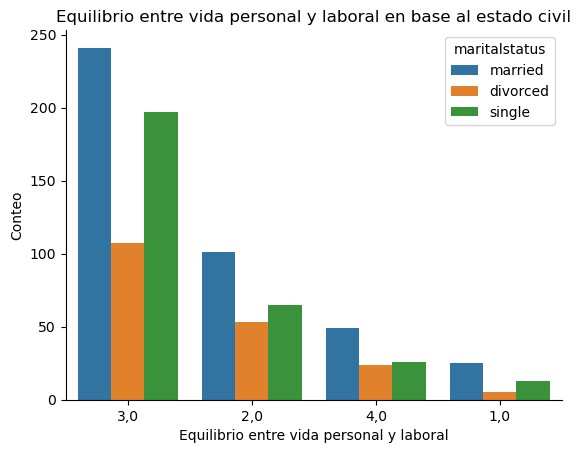

In [83]:
sns.countplot(data=df, hue='maritalstatus', x='worklifebalance' )
plt.title('Equilibrio entre vida personal y laboral en base al estado civil')
plt.ylabel('Conteo')
plt.xlabel('Equilibrio entre vida personal y laboral')
sns.despine(top=True, right=True)

education - job level
education - monthlyincome

C:\Users\grbia\AppData\Local\Temp\ipykernel_12024\4056375197.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='education', y='joblevel', palette= 'magma')


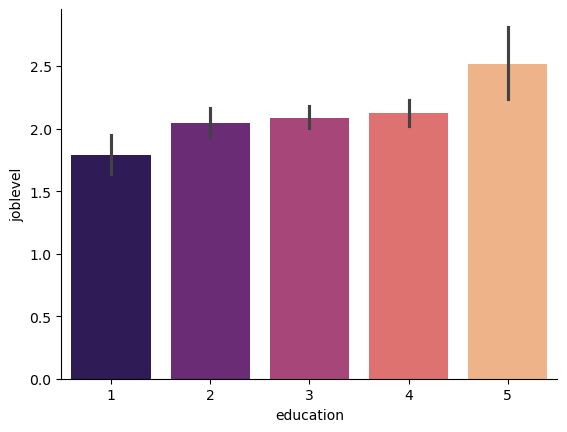

In [13]:
sns.barplot(data=df, x='education', y='joblevel', palette= 'magma')
sns.despine(top=True, right=True)

C:\Users\grbia\AppData\Local\Temp\ipykernel_12024\2035009325.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='education', y='monthlyincome', palette='pastel') #no parece que haya relación


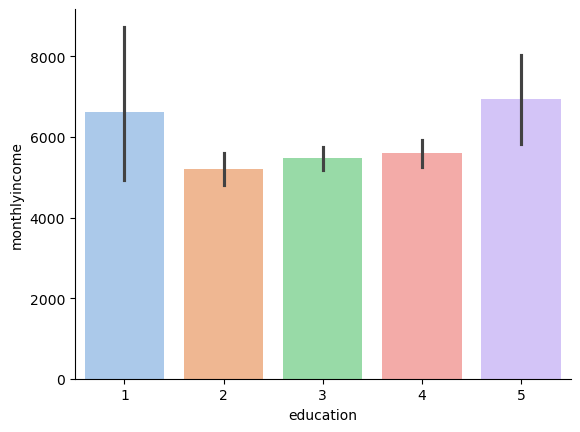

In [ ]:
sns.barplot(data=df, x='education', y='monthlyincome', palette='pastel') #no parece que haya relación
sns.despine(top=True, right=True)

ENVIRONMENT SATISFACTION- jobinvolvement 

<Axes: xlabel='environmentsatisfaction', ylabel='count'>

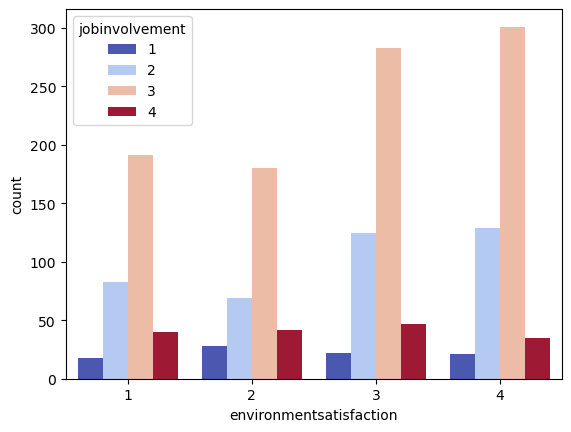

In [28]:
sns.countplot(data=df, x='environmentsatisfaction', hue='jobinvolvement', palette='coolwarm') #no parece que haya relacion

<Axes: xlabel='environmentsatisfaction', ylabel='count'>

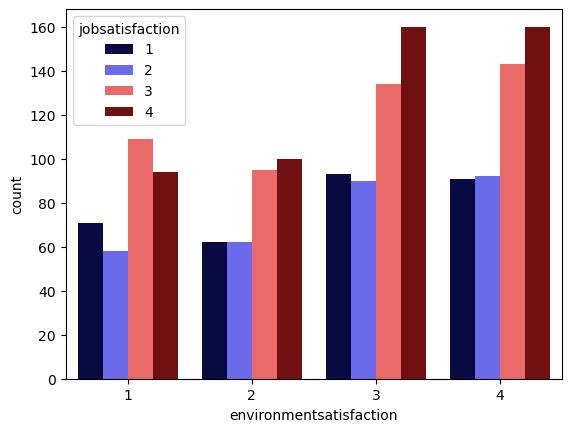

In [27]:
sns.countplot(data=df, x='environmentsatisfaction', hue='jobsatisfaction', palette='seismic')